# Supervised Learning - Foundations Project: ReCell 

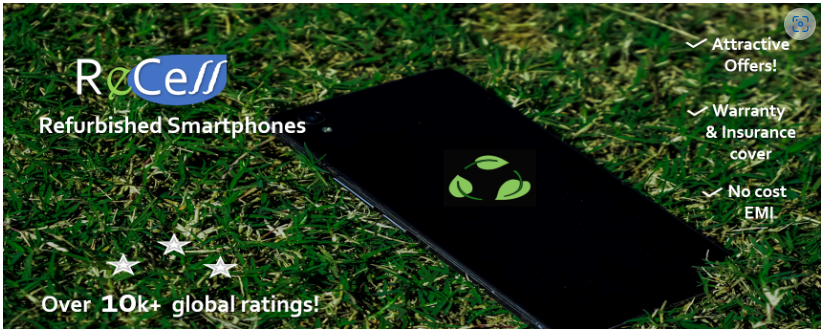

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.

 
### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.

 
### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries

In [1096]:
import pandas as pd
import numpy as np

# for visualizing data
import matplotlib.pyplot as plt
import seaborn as sns

# For randomized data splitting
from sklearn.model_selection import train_test_split

# To build linear regression_model
import statsmodels.api as sm

# To check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error

## Loading the dataset

In [1097]:
data = pd.read_csv("used_device_data.csv")

## Data Overview

The initial steps to get an overview of any dataset is to:

observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
get information about the number of rows and columns in the dataset
find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
check the statistical summary of the dataset to get an overview of the numerical columns of the data

### Displaying the first few rows of the dataset

In [1098]:
data.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


**Here's what each column represents:**

brand_name: Name of manufacturing brand
os: OS on which the device runs



screen_size: Size of the screen in cm
4g: Whether 4G is available or not

---


5g: Whether 5G is available or not
main_camera_mp: Resolution of the rear camera in megapixels
selfie_camera_mp: Resolution of the front camera in megapixels
int_memory: Amount of internal memory (ROM) in GB



ram: Amount of RAM in GB
battery: Energy capacity of the device battery in mAh
weight: Weight of the device in grams
release_year: Year when the device model was released
days_used: Number of days the used/refurbished device has been used
normalized_new_price: Normalized price of a new device of the same model in euros
normalized_used_price: Normalized price of the used/refurbished device in euros

###Checking the shape of the dataset**

In [1099]:
data.shape

(3454, 15)

The dataset contains information (15 attributes) from 3454 records.

###Checking the data types of the columns for the dataset** 

In [1100]:
data.info

<bound method DataFrame.info of      brand_name       os  screen_size   4g   5g  main_camera_mp  \
0         Honor  Android        14.50  yes   no            13.0   
1         Honor  Android        17.30  yes  yes            13.0   
2         Honor  Android        16.69  yes  yes            13.0   
3         Honor  Android        25.50  yes  yes            13.0   
4         Honor  Android        15.32  yes   no            13.0   
...         ...      ...          ...  ...  ...             ...   
3449       Asus  Android        15.34  yes   no             NaN   
3450       Asus  Android        15.24  yes   no            13.0   
3451    Alcatel  Android        15.80  yes   no            13.0   
3452    Alcatel  Android        15.80  yes   no            13.0   
3453    Alcatel  Android        12.83  yes   no            13.0   

      selfie_camera_mp  int_memory  ram  battery  weight  release_year  \
0                  5.0        64.0  3.0   3020.0   146.0          2020   
1              

**Observations:** 
We can see that this data is about different mobile phones.

Some of the values are  missing values, such as main_camera_mp and weight.

The release years of the phones range from 2016 to 2021.

The DataFrame has 3454 rows and 15 columns.



### Statistical summary of the dataset

In [1101]:
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,3454,34,Others,502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,3454,4,Android,3214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen_size,3454.0,NaN,NaN,NaN,13.713115,3.80528,5.08,12.7,12.83,15.34,30.71
4g,3454,2,yes,2335,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,3454,2,no,3302,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_camera_mp,3275.0,NaN,NaN,NaN,9.460208,4.815461,0.08,5.0,8.0,13.0,48.0
selfie_camera_mp,3452.0,NaN,NaN,NaN,6.554229,6.970372,0.0,2.0,5.0,8.0,32.0
int_memory,3450.0,NaN,NaN,NaN,54.573099,84.972371,0.01,16.0,32.0,64.0,1024.0
ram,3450.0,NaN,NaN,NaN,4.036122,1.365105,0.02,4.0,4.0,4.0,12.0
battery,3448.0,NaN,NaN,NaN,3133.402697,1299.682844,500.0,2100.0,3000.0,4000.0,9720.0


**Observations:** 

The summary statistics of the dataset are given as follows:


The brand_name column has 34 unique values, with the most frequent being Others occurring 502 times.

The os column has 4 unique values, with the most frequent being Android occurring 3214 times.

The screen_size column has a mean of 13.71 and a standard deviation of 3.81, with the minimum value being 5.08 and the maximum value being 30.71.

The 4g column has two unique values: yes and no, with yes occurring 2335 times.

The 5g column has two unique values: yes and no, with no occurring 3302 times.

The main_camera_mp column has a mean of 9.46 and a standard deviation of 4.82, with the minimum value being 0.08 and the maximum value being 48.0.

The selfie_camera_mp column has a mean of 6.55 and a standard deviation of 6.97, with the minimum value being 0.0 and the maximum value being 32.0.

The int_memory column has a mean of 54.57 and a standard deviation of 84.97, with the minimum value being 0.01 and the maximum value being 1024.0.

The ram column has a mean of 4.04 and a standard deviation of 1.37, with the minimum value being 0.02 and the maximum value being 12.0.

The battery column has a mean of 3133.40 and a standard deviation of 1299.68, with the minimum value being 500.0 and the maximum value being 9720.0.

The weight column has a mean of 182.75 and a standard deviation of 88.41, with the minimum value being 69.0 and the maximum value being 855.0.

The release_year column has a mean of 2015.97 and a standard deviation of 2.30, with the minimum value being 2013.0 and the maximum value being 2020.0.

The days_used column has a mean of 674.87 and a standard deviation of 248.58, with the minimum value being 91.0 and the maximum value being 1094.0.

The normalized_used_price column has a mean of 4.36 and a standard deviation of 0.59, with the minimum value being 1.54 and the maximum value being 6.62.

The normalized_new_price column has a mean of 5.23 and a standard deviation of 0.68, with the minimum value being 2.90 and the maximum value being 7.85.



### Checking for duplicate values

In [1102]:
data.duplicated().sum()

0

**Observations:** 

There are no duplicate values in the data

###Checking for missing values

In [1103]:
data.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

**Observations:** 

179 records missing  main_camera_mp 

2 records missing selfie_camera_mp           

4 records missing int_memory

4 records missing ram

6 records missing battery

7 records missing weight







In [1104]:
# creating a copy of the data so that original data remains unchanged
df = data.copy()

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device?

In [1105]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [1106]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

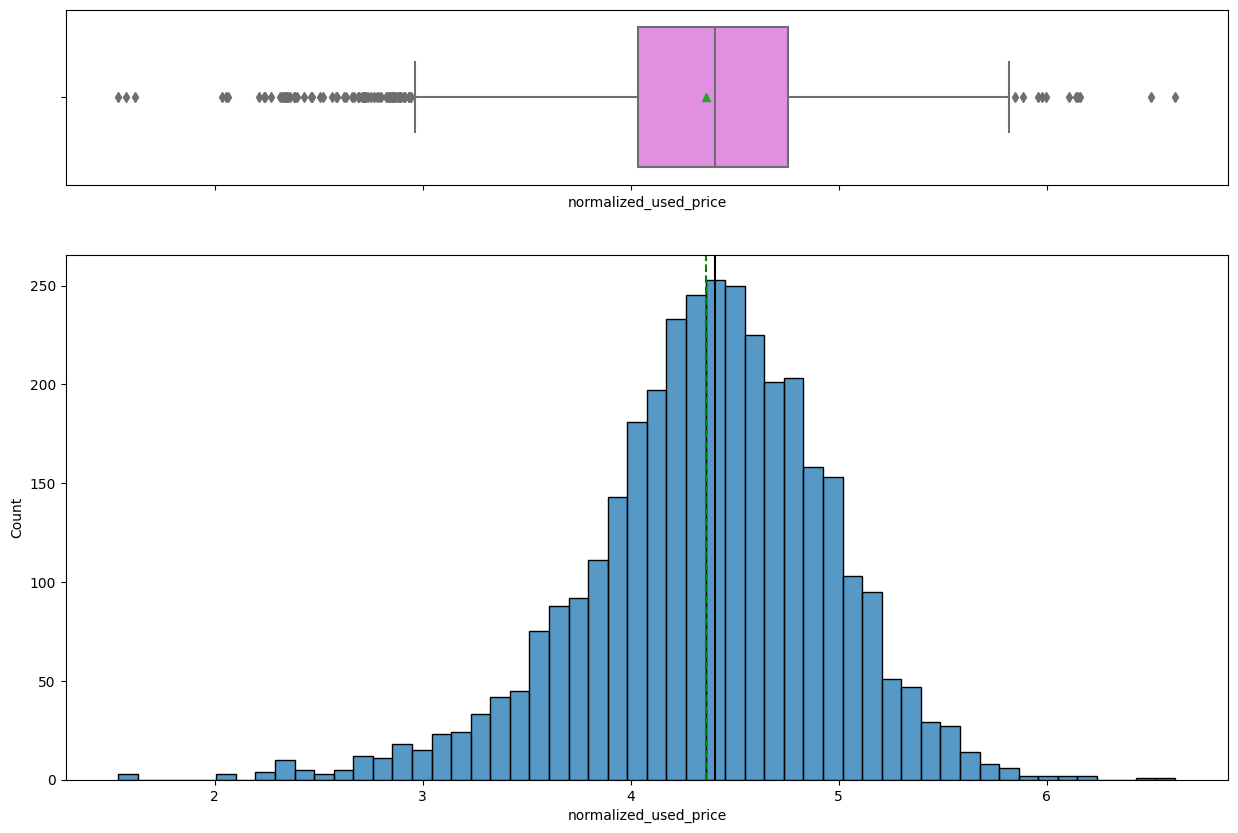

In [1107]:
histogram_boxplot(df, "normalized_used_price")

**Observations:** 
It is slightly skewed to the right, with a majority of the values falling between 4 and 5.
Observations:

The histogram shows that the distribution of normalized used device prices is skewed to the right, indicating that a majority of the devices have lower prices while a few devices have much higher prices.
The boxplot shows that there are a few outliers with prices significantly higher than the rest of the devices, which confirms the skewness observed in the histogram.

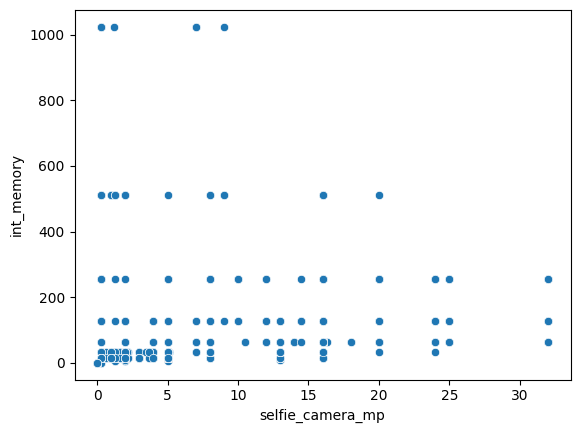

In [1108]:
sns.scatterplot(x='selfie_camera_mp', y='int_memory', data=data)
plt.show()

**Observations:** 

There doesn't seem to be any significant correlation between selfie camera megapixels and internal memory (ROM) in the devices.
However, it appears that devices with higher internal memory tend to have a wider range of selfie camera megapixels.

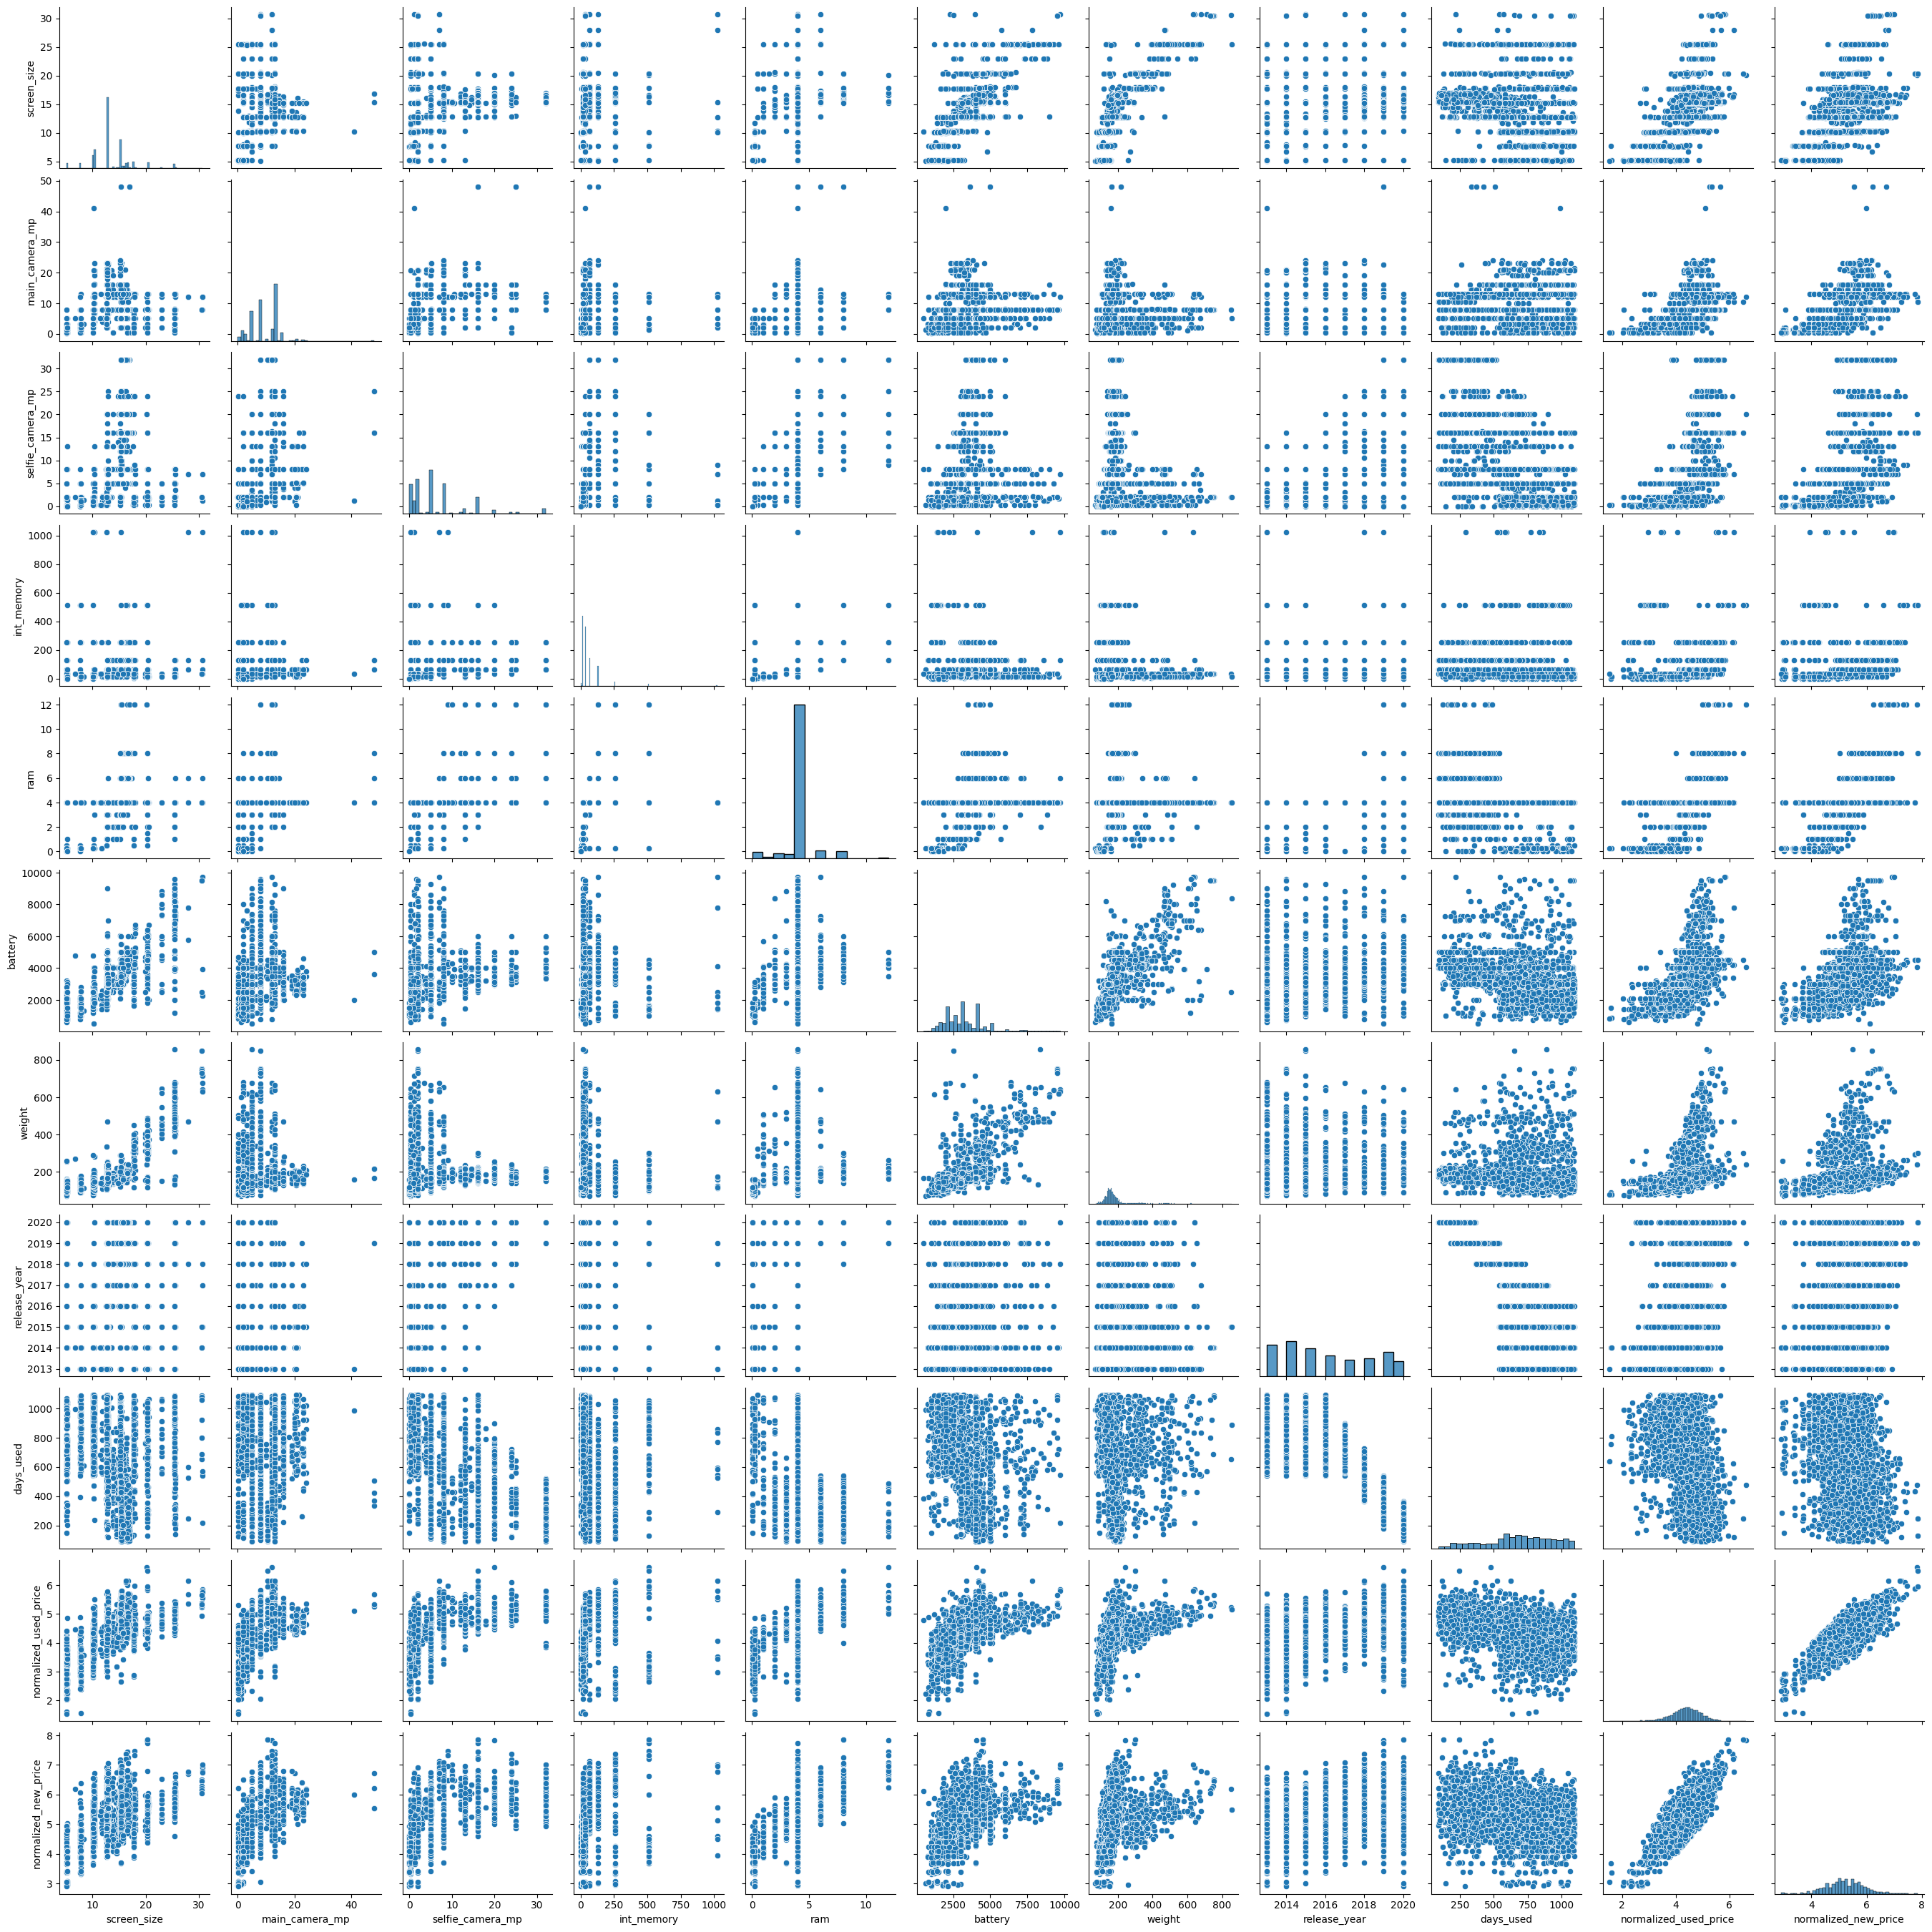

In [1109]:
sns.pairplot(data)
plt.show()

### What does the distribution of normalized used device prices look like?

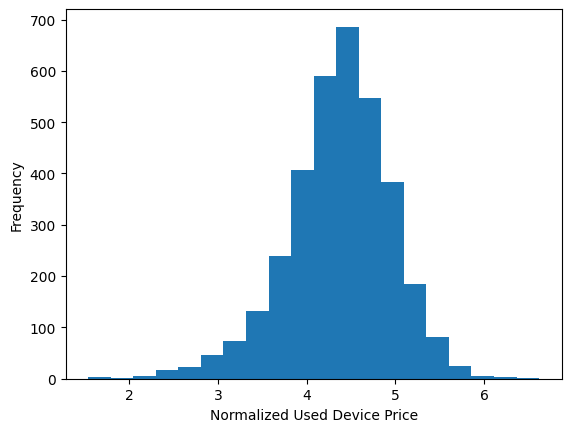

In [1110]:
import matplotlib.pyplot as plt

plt.hist(data['normalized_used_price'], bins=20)
plt.xlabel('Normalized Used Device Price')
plt.ylabel('Frequency')
plt.show()

**Observations:** 
In this histogram we see that how the prices are distributed. The histogram is skewed to the left, for example, it indicate that there are more low-priced devices than high-priced ones.


###What percentage of the used device market is dominated by Android devices?


calculate the percentage of the used device market dominated by Android devices, we need to count the number of Android devices in the dataset and divide it by the total number of devices.

In [1111]:
len(data)

3454

In [1112]:
data.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


In [1113]:
non_android_devices = data[data['os'] != 'Android']
len(non_android_devices)
len(data)

3454

In [1114]:
android_devices = data[data['os'] == 'Android']
android_market_share = len(android_devices) / len(data) * 100
print(f"The percentage of the used device market dominated by Android devices is {android_market_share:.2f}%")

The percentage of the used device market dominated by Android devices is 93.05%


###The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?

####To visualize the variation of RAM with brand, we can use a box plot.use the seaborn library to create the plot.

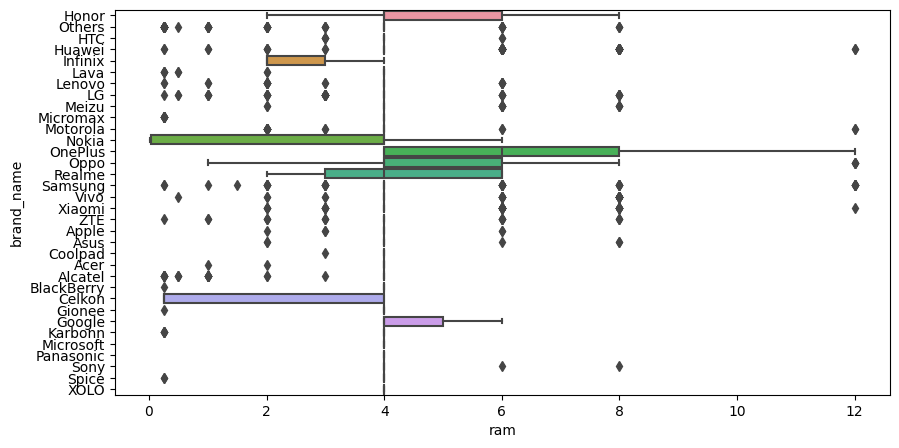

In [1115]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="ram", y="brand_name")
plt.show()

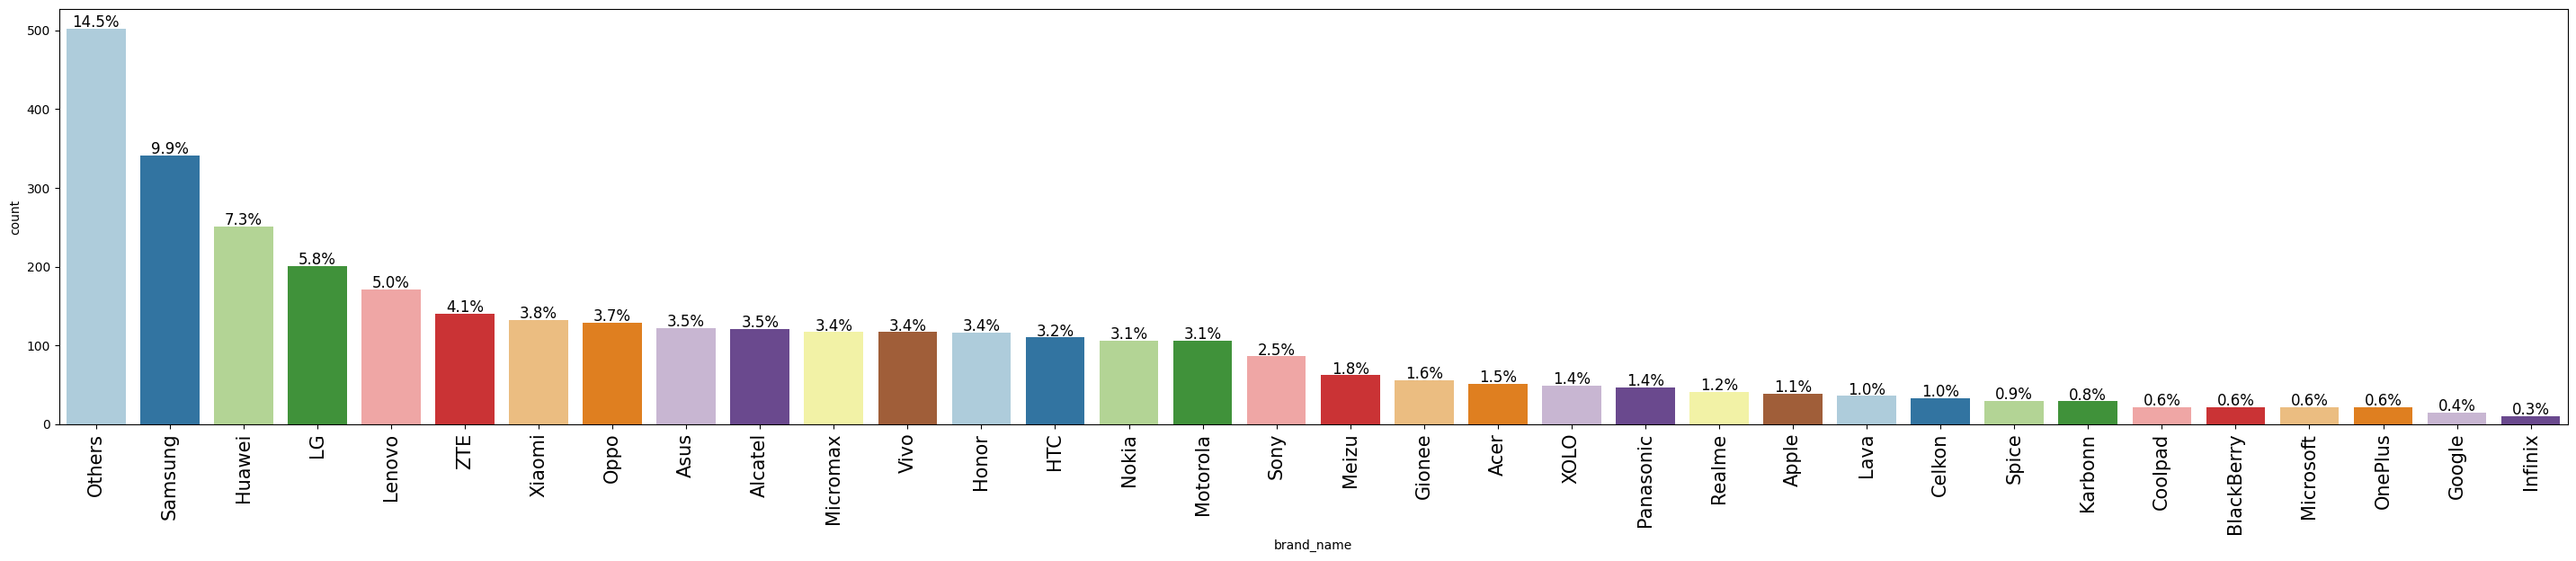

In [1116]:
labeled_barplot(df, "brand_name", perc=True)

<Axes: xlabel='brand_name', ylabel='ram'>

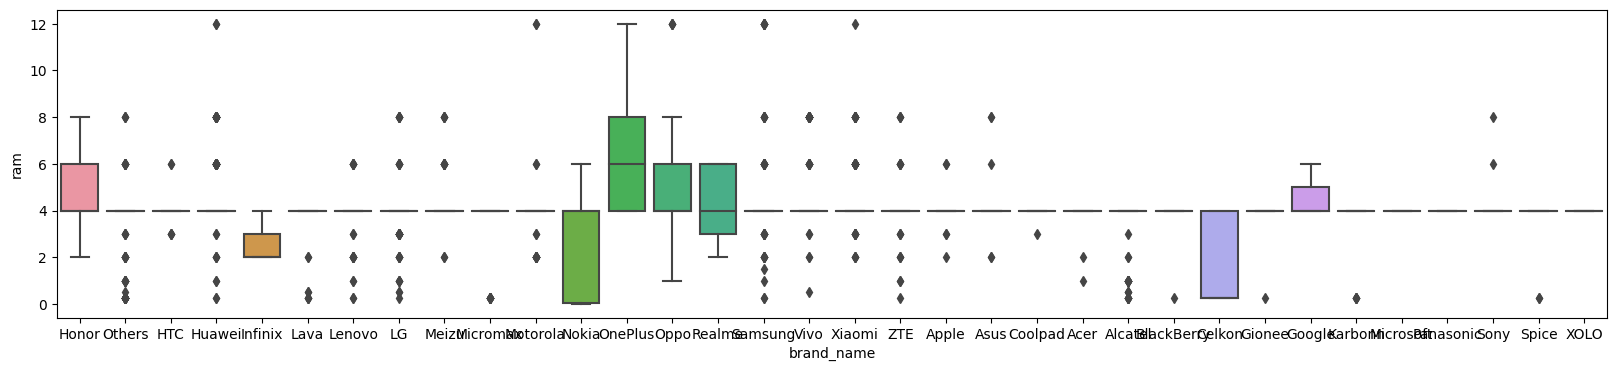

In [1117]:
import seaborn as sns
plt.figure(figsize=(20, 4))
sns.boxplot(x="brand_name", y="ram", data=data)

**Observations:** 

From the plot, we can see that some brands have a wider range of RAM sizes than others. For example, Samsung and Apple have a wider range of RAM sizes than Huawei and Xiaomi. We can also see that some brands, such as Alcatel and Asus, have a lower median RAM size than others. Overall, the plot gives us a good idea of how the amount of RAM varies across different brands of devices.

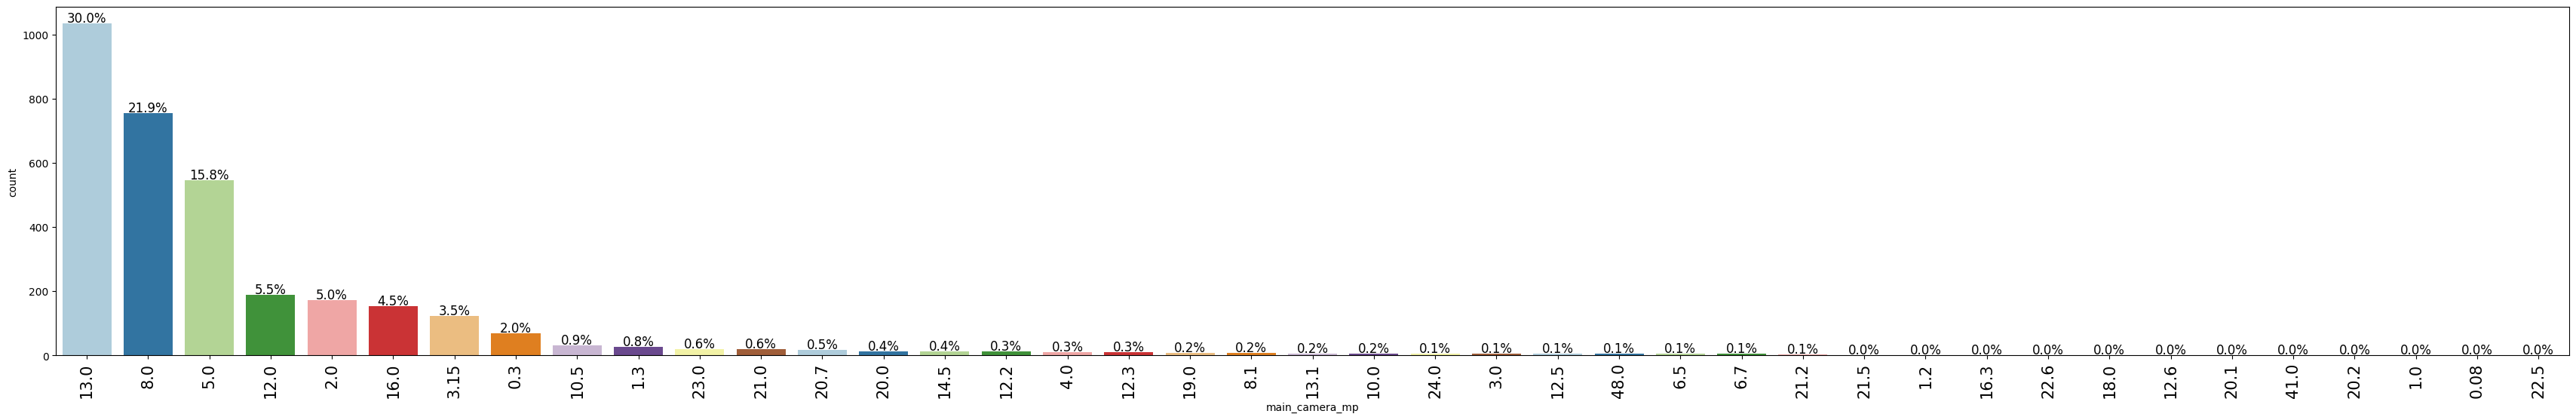

In [1118]:
labeled_barplot(df, "main_camera_mp", perc=True)

In [1119]:
# creating a list of numerical columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()

# dropping start and finish year from list of numerical columns as they are not numerical in nature
num_cols.remove("main_camera_mp")
num_cols.remove("weight")

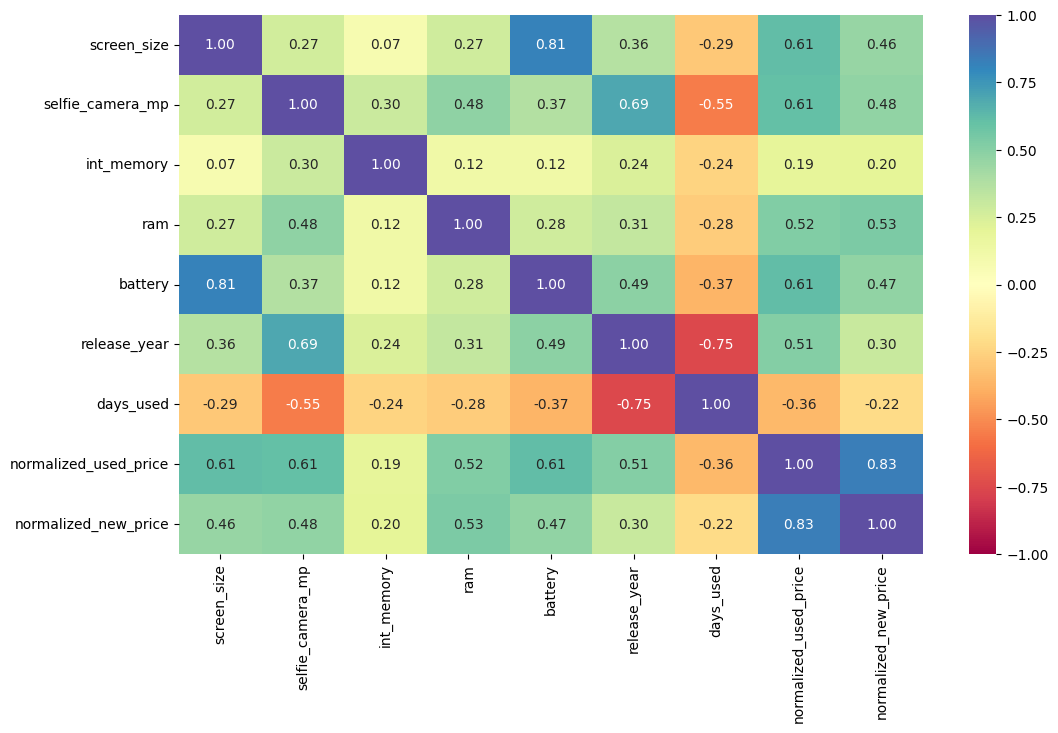

In [1120]:
plt.figure(figsize=(12, 7))
sns.heatmap(
    df[num_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

### A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?

In [1121]:
import matplotlib.pyplot as plt

# Filter devices with battery capacity greater than 4500 mAh
large_battery = data[data['battery'] > 4500]

In [1122]:
len(large_battery)

341

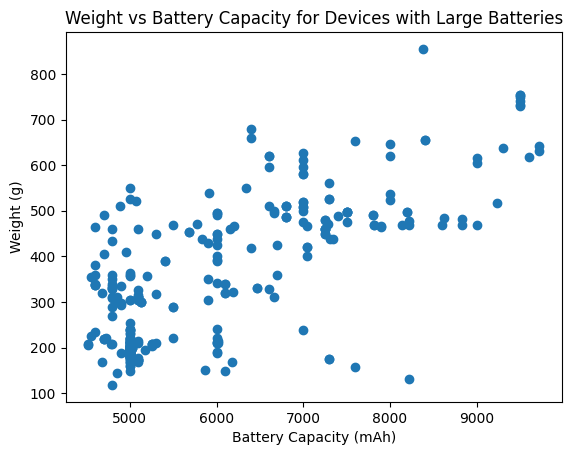

In [1123]:
# Create the scatter plot
plt.scatter(large_battery['battery'], large_battery['weight'])
plt.xlabel('Battery Capacity (mAh)')
plt.ylabel('Weight (g)')
plt.title('Weight vs Battery Capacity for Devices with Large Batteries')
plt.show()

**Observations:**

Looks like there is no linear relationship between weight and battery capacity. Sometimes capacity high and device is light weighted. Where as some times higher  capacity has higher weight.

###	Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?


In [1124]:
# Filter the devices with a screen size greater than 6 inches
large_screens = data[data['screen_size'] > 6]

In [1125]:
large_screens.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


In [1126]:
# Count the number of phones and tablets for each brand
count_4g = large_screens.groupby('brand_name')['4g'].value_counts()
print(count_4g)

brand_name  4g 
Acer        no      35
            yes     16
Alcatel     no      58
            yes     57
Apple       yes     39
Asus        yes     80
            no      42
BlackBerry  yes     20
            no       1
Celkon      no      25
Coolpad     yes     22
Gionee      yes     30
            no      26
Google      yes     14
            no       1
HTC         yes     84
            no      26
Honor       yes    108
            no       8
Huawei      yes    213
            no      38
Infinix     yes     10
Karbonn     no      29
LG          yes    151
            no      46
Lava        no      29
            yes      7
Lenovo      yes    113
            no      58
Meizu       yes     61
            no       1
Micromax    no      84
            yes     24
Microsoft   no      12
            yes     10
Motorola    yes     98
            no       8
Nokia       yes     54
            no      18
OnePlus     yes     22
Oppo        yes    116
            no      13
Others      no    

**Observations:** 
Many brands offer phones and tablets larger than 6 inches in size.

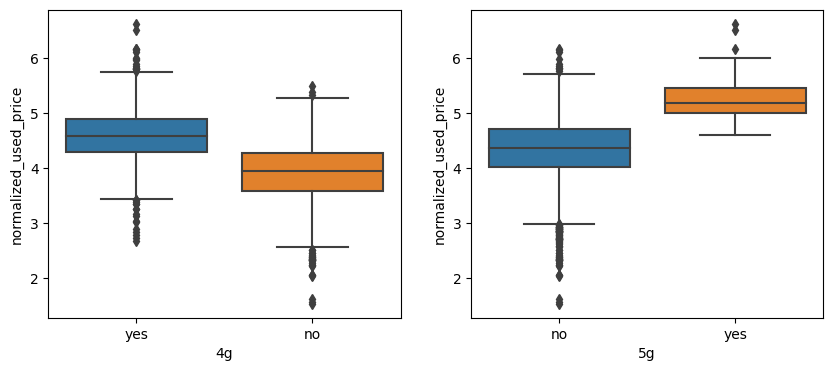

In [1127]:
plt.figure(figsize=(10, 4))

plt.subplot(121)
sns.boxplot(data=df, x="4g", y="normalized_used_price")

plt.subplot(122)
sns.boxplot(data=df, x="5g", y="normalized_used_price")

plt.show()

###	A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?


In [1128]:
df_selfie_camera = df[df.selfie_camera_mp > 8]
df_selfie_camera.shape

(655, 15)

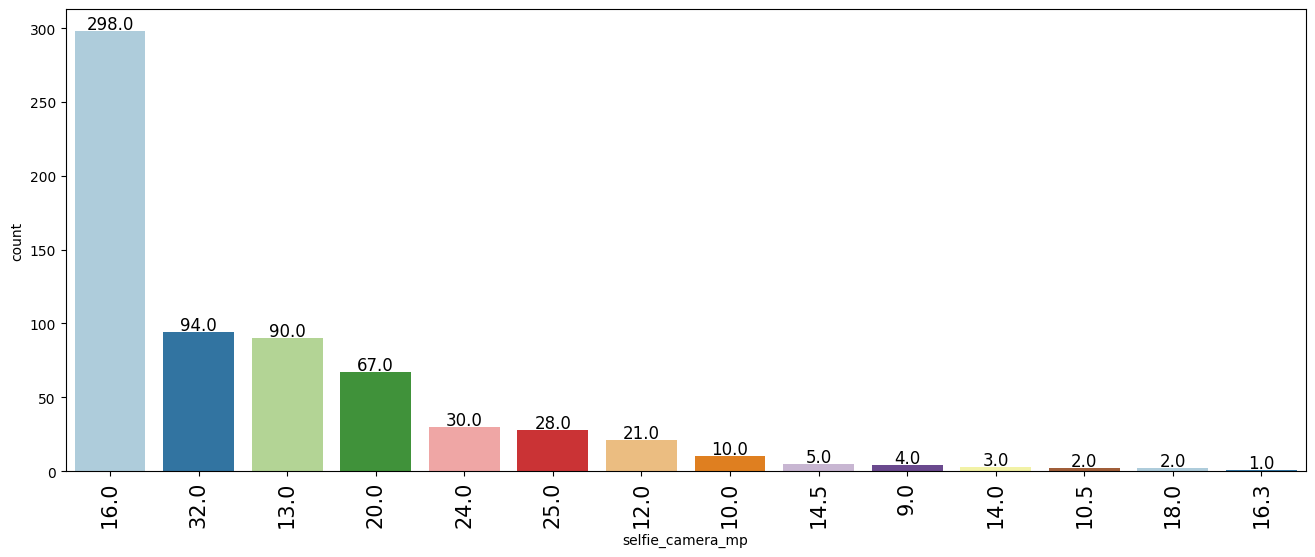

In [1129]:
labeled_barplot(df_selfie_camera,'selfie_camera_mp') ## Complete the code to create labeled_barplot for 'brand_name' in high selfie camera dataframe

**Observations:** 


There are 298 devices offering 6. megapixel. Comparatively very few devices have p MP. Highest pixels offered are 32.

###	Which attributes are highly correlated with the normalized price of a used device


In [1130]:
corr = data.corr(numeric_only=True)['normalized_used_price'].sort_values(ascending=False)

In [1131]:
print(corr.head)

<bound method NDFrame.head of normalized_used_price    1.000000
normalized_new_price     0.834496
screen_size              0.614785
battery                  0.613619
selfie_camera_mp         0.608074
main_camera_mp           0.587302
ram                      0.520289
release_year             0.509790
weight                   0.382354
int_memory               0.190993
days_used               -0.358264
Name: normalized_used_price, dtype: float64>


**Observations:** 

Normalized used price highly co-related with normalized new price, screen size, battery, selfie camera, in that order.

## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [1132]:
df1 = df.copy()

In [1133]:
df1.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

In [1134]:
df1['selfie_camera_mp'] = df1.groupby(['brand_name'])['selfie_camera_mp'].transform(lambda x: x.fillna(x.median()))



In [1135]:
df1['int_memory'] = df1.groupby(['brand_name'])['int_memory'].transform(lambda x: x.fillna(x.median()))


In [1136]:
df1['ram'] = df1.groupby(['brand_name'])['ram'].transform(lambda x: x.fillna(x.median()))


In [1137]:
df1['battery'] = df1.groupby(['brand_name'])['battery'].transform(lambda x: x.fillna(x.median()))


In [1138]:
df1['weight'] = df1.groupby(['brand_name'])['weight'].transform(lambda x: x.fillna(x.median()))


In [1139]:
median_by_brand = df1.groupby('brand_name')['main_camera_mp'].transform('median')
df1['main_camera_mp'].fillna(median_by_brand, inplace=True)

In [1140]:
overall_median = df1['main_camera_mp'].median()
df1['main_camera_mp'].fillna(overall_median, inplace=True)



## EDA

Explore the data once again after manipulating it.

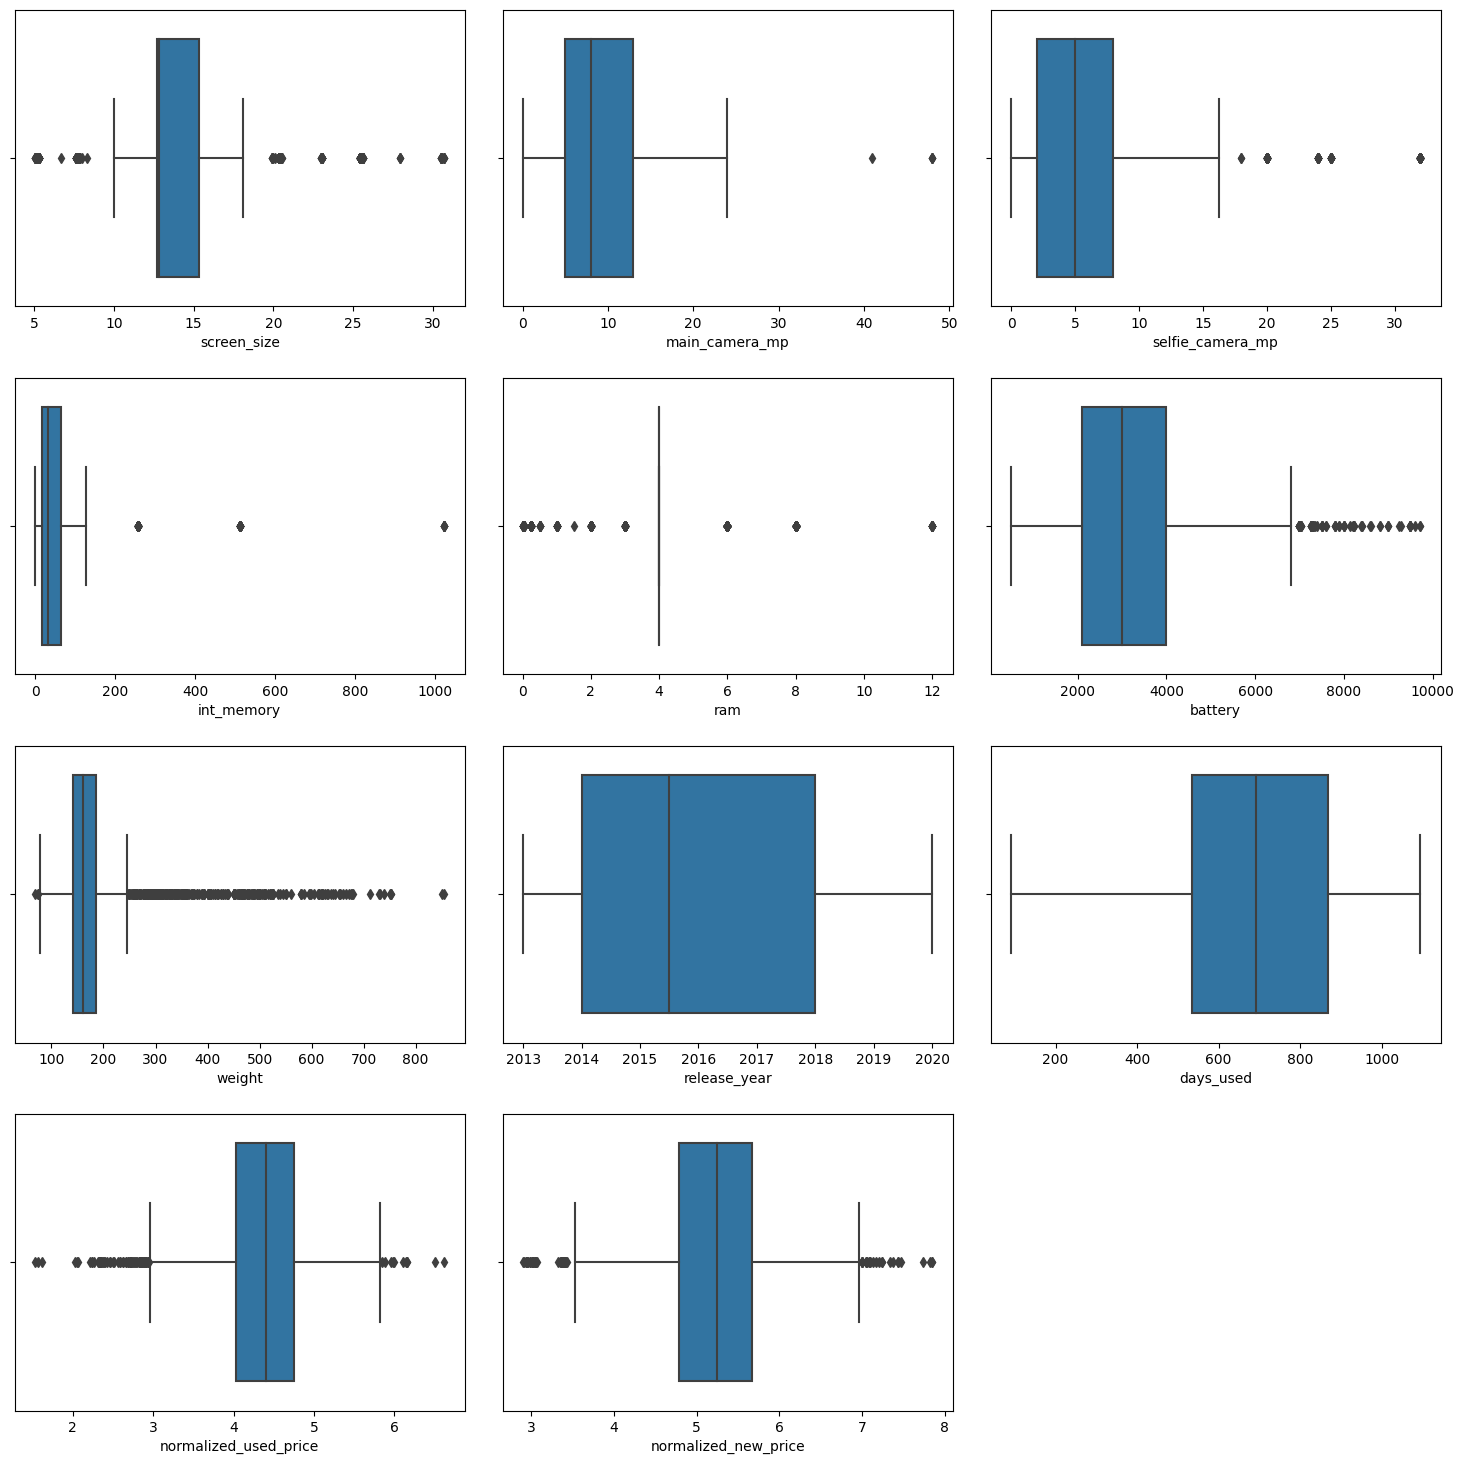

In [1141]:
# outlier detection using boxplot
num_cols = df1.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 15))

for i, variable in enumerate(num_cols):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(data=df1, x=variable)
    plt.tight_layout(pad=2)

plt.show()

In [1142]:
X = df1.drop(['normalized_used_price'], axis=1)
y = df1['normalized_used_price']

print(X.head())
print()
print(y.head())

  brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android        14.50  yes   no            13.0   
1      Honor  Android        17.30  yes  yes            13.0   
2      Honor  Android        16.69  yes  yes            13.0   
3      Honor  Android        25.50  yes  yes            13.0   
4      Honor  Android        15.32  yes   no            13.0   

   selfie_camera_mp  int_memory  ram  battery  weight  release_year  \
0               5.0        64.0  3.0   3020.0   146.0          2020   
1              16.0       128.0  8.0   4300.0   213.0          2020   
2               8.0       128.0  8.0   4200.0   213.0          2020   
3               8.0        64.0  6.0   7250.0   480.0          2020   
4               8.0        64.0  3.0   5000.0   185.0          2020   

   days_used  normalized_new_price  
0        127              4.715100  
1        325              5.519018  
2        162              5.884631  
3        345              5.630961  
4  

In [1143]:
X = sm.add_constant(X)

In [1144]:
X = pd.get_dummies(
X,
columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
drop_first=True,
)

X.head()

,const,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,...,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,1.0,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,...,0,0,0,0,0,0,0,0,1,0
1,1.0,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,...,0,0,0,0,0,0,0,0,1,1
2,1.0,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,...,0,0,0,0,0,0,0,0,1,1
3,1.0,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,...,0,0,0,0,0,0,0,0,1,1
4,1.0,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,...,0,0,0,0,0,0,0,0,1,0


In [1145]:
# splitting the data in 70:30 ratio for train to test data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [1146]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 2417
Number of rows in test data = 1037


In [1147]:
x_train.isnull().sum()

const                    0
screen_size              0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_new_price     0
brand_name_Alcatel       0
brand_name_Apple         0
brand_name_Asus          0
brand_name_BlackBerry    0
brand_name_Celkon        0
brand_name_Coolpad       0
brand_name_Gionee        0
brand_name_Google        0
brand_name_HTC           0
brand_name_Honor         0
brand_name_Huawei        0
brand_name_Infinix       0
brand_name_Karbonn       0
brand_name_LG            0
brand_name_Lava          0
brand_name_Lenovo        0
brand_name_Meizu         0
brand_name_Micromax      0
brand_name_Microsoft     0
brand_name_Motorola      0
brand_name_Nokia         0
brand_name_OnePlus       0
brand_name_Oppo          0
brand_name_Others        0
brand_name_Panasonic     0
brand_name_Realme        0
b

## Model Building - Linear Regression

In [1148]:
olsmodel = sm.OLS(y_train,x_train).fit()
print(olsmodel.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.845
Model:                               OLS   Adj. R-squared:                  0.842
Method:                    Least Squares   F-statistic:                     268.8
Date:                   Sat, 13 May 2023   Prob (F-statistic):               0.00
Time:                           02:56:11   Log-Likelihood:                 124.15
No. Observations:                   2417   AIC:                            -150.3
Df Residuals:                       2368   BIC:                             133.4
Df Model:                             48                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


###Make the linear model using statsmodels OLS and print the model summary.


In [1149]:
import numpy as np

# Create a numpy array of dependent variable y
#y = np.array([10, 20, 30, 40, 50])


In [1150]:
#X = np.array([[1, 2], [1, 4], [1, 6], [1, 8], [1, 10]])

In [1151]:
# Generate some random data
X = np.random.normal(0, 1, 100)
y = 2*x + np.random.normal(0, 1, 100)

In [1152]:
# Add a constant term to the independent variable(s) X
X = sm.add_constant(X)

# Fit the OLS model and print the model summary
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.009
Method:                 Least Squares   F-statistic:                    0.1633
Date:                Sat, 13 May 2023   Prob (F-statistic):              0.687
Time:                        02:56:11   Log-Likelihood:                -222.19
No. Observations:                 100   AIC:                             448.4
Df Residuals:                      98   BIC:                             453.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4375      0.230      1.899      0.0

## Model Performance Check

Let's check the performance of the model using different metrics.


We will be using metric functions defined in sklearn for RMSE, MAE, and R2
.
We will define a function to calculate MAPE and adjusted R2
.

The mean absolute percentage error (MAPE) measures the accuracy of predictions as a percentage, and can be calculated as the average absolute percent error for each predicted value minus actual values divided by actual values. It works best if there are no extreme values in the data and none of the actual values are 0.
We will create a function which will print out all the above metrics in one go

In [1153]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))
    # function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf


In [1154]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
from sklearn.metrics import r2_score
olsmodel_train_perf = model_performance_regression(olsmodel, x_train, y_train)
olsmodel_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.229856,0.180302,0.844924,0.841713,4.326213


In [1155]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_test_perf = model_performance_regression(olsmodel, x_test, y_test)
olsmodel_test_perf


Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.238482,0.184868,0.842315,0.834487,4.505694


Observation: On trained model and test data adj R sqaure and R2 are very close.

#Checking Linear Regression Assumptions

No Multicollinearity


In [1156]:
#Let's define a function to check VIF.
from statsmodels.stats.outliers_influence import variance_inflation_factor
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [1157]:
checking_vif(x_train) 

,feature,VIF
0,const,3.791082e+06
1,screen_size,7.677118e+00
2,main_camera_mp,2.284685e+00
3,selfie_camera_mp,2.810716e+00
4,int_memory,1.364057e+00
5,ram,2.255246e+00
6,battery,4.081715e+00
7,weight,6.397183e+00
8,release_year,4.898360e+00
9,days_used,2.660002e+00


### Remove Multicoliearity

In [1158]:
### Removing Multicollinearity

In [1159]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [1160]:
col_list = ["screen_size", "weight","brand_name_Huawei","brand_name_Others","brand_name_Samsung"]

res = treating_multicollinearity(x_train, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,brand_name_Huawei,0.841847,0.232173
1,brand_name_Others,0.841844,0.232175
2,brand_name_Samsung,0.841812,0.232199
3,screen_size,0.838427,0.234670
4,weight,0.838102,0.234906


In [1161]:
col_to_drop = "brand_name_Huawei"
x_train2 = x_train.loc[:, ~x_train.columns.str.startswith(col_to_drop)]
x_test2 = x_test.loc[:, ~x_test.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  brand_name_Huawei


,feature,VIF
0,const,3.790622e+06
1,screen_size,7.673517e+00
2,main_camera_mp,2.284068e+00
3,selfie_camera_mp,2.807179e+00
4,int_memory,1.362437e+00
5,ram,2.255227e+00
6,battery,4.080568e+00
7,weight,6.397002e+00
8,release_year,4.897273e+00
9,days_used,2.659284e+00


**Observations:**  We have dealt with multicollinearity in the data
Let's rebuild the model using the updated set of predictors variables

In [1162]:
olsmod1 = sm.OLS(y_train, x_train2).fit()
print(olsmod1.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.845
Model:                               OLS   Adj. R-squared:                  0.842
Method:                    Least Squares   F-statistic:                     274.6
Date:                   Sat, 13 May 2023   Prob (F-statistic):               0.00
Time:                           02:56:12   Log-Likelihood:                 124.14
No. Observations:                   2417   AIC:                            -152.3
Df Residuals:                       2369   BIC:                             125.6
Df Model:                             47                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


**Observations:** 

We can see that adj. R-squared has no change from .845, which shows that the dropped columns did not have much effect on the model.

As there is no multicollinearity, we can look at the p-values of predictor variables to check their significance

## Dealing with high p-value variables

In [1163]:
# initial list of columns
predictors = x_train2.copy()
cols = predictors.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = predictors[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'screen_size', 'main_camera_mp', 'selfie_camera_mp', 'ram', 'battery', 'weight', 'release_year', 'normalized_new_price', 'brand_name_Lenovo', 'brand_name_Nokia', 'brand_name_Xiaomi', 'os_Others', '4g_yes']


In [1164]:
x_train3 = x_train2[selected_features]
x_test3 = x_test2[selected_features]

In [1165]:
olsmod2 = sm.OLS(y_train, x_train3).fit()
print(olsmod2.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.842
Model:                               OLS   Adj. R-squared:                  0.842
Method:                    Least Squares   F-statistic:                     988.3
Date:                   Sat, 13 May 2023   Prob (F-statistic):               0.00
Time:                           02:56:13   Log-Likelihood:                 104.95
No. Observations:                   2417   AIC:                            -181.9
Df Residuals:                       2403   BIC:                            -100.8
Df Model:                             13                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [1166]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmod2_train_perf = model_performance_regression(olsmod2, x_train3, y_train)
olsmod2_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.231688,0.181745,0.842441,0.841523,4.359443


In [1167]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmod2_test_perf = model_performance_regression(olsmod2, x_test3, y_test)
olsmod2_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.236891,0.183559,0.844412,0.84228,4.469796


**Observations:** 
Now no feature has p-value greater than 0.05, so we'll consider the features in x_train3 as the final set of predictor variables and olsmod2 as the final model to move forward with
Now adjusted R-squared is 0.84228, i.e., our model is able to explain ~84% of the variance
The adjusted R-squared in olsmod1 (where we considered the variables without multicollinearity) was 0.84228
This shows that the variables we dropped were not affecting the model
RMSE and MAE values are comparable for train and test sets, indicating that the model is not overfitting

Now we'll check the rest of the assumptions on olsmod2.

Linearity of variables

Independence of error terms

Normality of error terms

No Heteroscedasticity

TEST FOR LINEARITY AND INDEPENDENCE

In [1168]:
# let us create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmod2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmod2.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
3026,4.087488,3.855295,0.232193
1525,4.448399,4.628844,-0.180445
1128,4.315353,4.280692,0.034660
3003,4.282068,4.206360,0.075709
2907,4.456438,4.470310,-0.013872


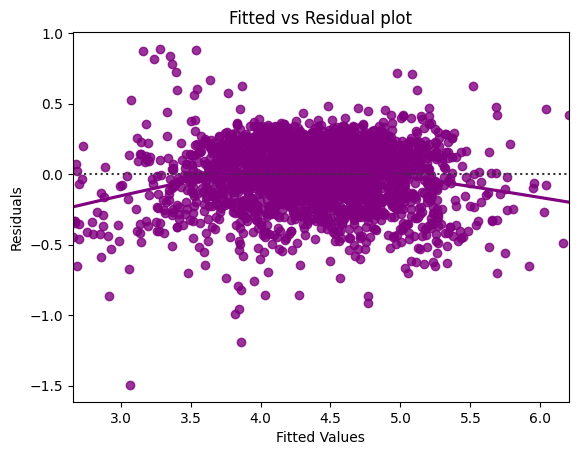

In [1169]:
# let's plot the fitted values vs residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

**Observations:** 

The scatter plot shows the distribution of residuals (errors) vs fitted values (predicted values).

If there exist any pattern in this plot, we consider it as signs of non-linearity in the data and a pattern means that the model doesn't capture non-linear effects.

We see no pattern in the plot above. Hence, the assumptions of linearity and independence are satisfied.

TEST FOR NORMALITY

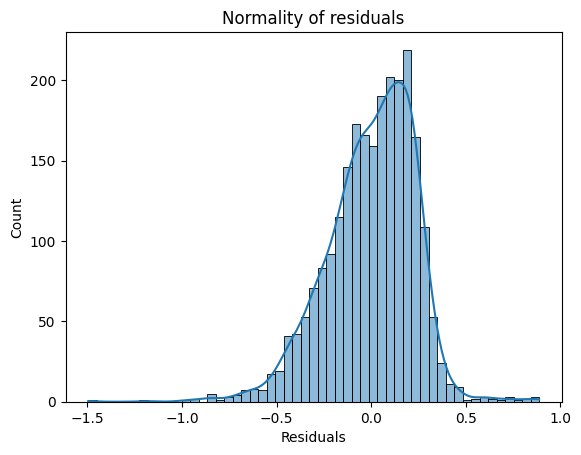

In [1170]:
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

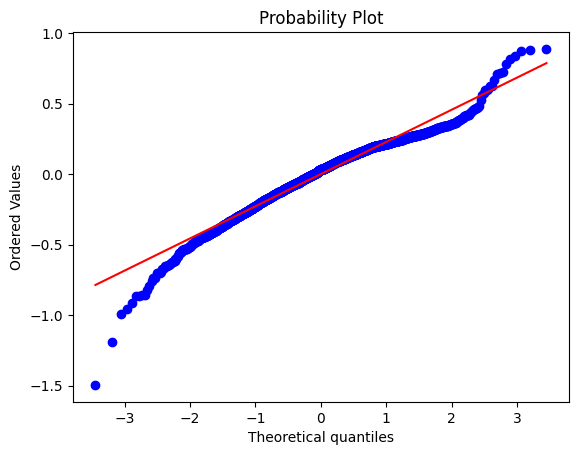

In [1171]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

In [1172]:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9690812230110168, pvalue=2.1050240811778668e-22)

TEST FOR HOMOSCEDASTICITY

In [1173]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train3)
lzip(name, test)

[('F statistic', 1.0431128107825964), ('p-value', 0.23292738306792246)]

Predictions on test data

Now that we have checked all the assumptions of linear regression and they are satisfied, let's go ahead with prediction.

In [1174]:
# predictions on the test set
pred = olsmod2.predict(x_test3)

df_pred_test = pd.DataFrame({"Actual": y_test, "Predicted": pred})
df_pred_test.sample(10, random_state=1)

,Actual,Predicted
1995,4.566741,4.373852
2341,3.696103,3.962951
1913,3.592093,3.691084
688,4.306495,4.116870
650,4.522115,5.137584
2291,4.259294,4.395320
40,4.997685,5.434438
1884,3.875359,4.054813
2538,4.206631,4.047358
45,5.380450,5.276783


**Observations:** 

We can observe here that our model has returned pretty good prediction results, and the actual and predicted values are comparable

# *Final* Model

Let's recreate the final model and print it's summary to gain insights.

In [1175]:
x_train_final = x_train3.copy()
x_test_final = x_test3.copy()

In [1176]:
olsmodel_final = sm.OLS(y_train, x_train_final).fit()
print(olsmodel_final.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.842
Model:                               OLS   Adj. R-squared:                  0.842
Method:                    Least Squares   F-statistic:                     988.3
Date:                   Sat, 13 May 2023   Prob (F-statistic):               0.00
Time:                           02:56:14   Log-Likelihood:                 104.95
No. Observations:                   2417   AIC:                            -181.9
Df Residuals:                       2403   BIC:                            -100.8
Df Model:                             13                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [1177]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_final_train_perf = model_performance_regression(
    olsmodel_final, x_train_final, y_train
)
olsmodel_final_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.231688,0.181745,0.842441,0.841523,4.359443


In [1178]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_final_test_perf = model_performance_regression(
    olsmodel_final, x_test_final, y_test
)
olsmodel_final_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.236891,0.183559,0.844412,0.84228,4.469796


**Observations:** 

The RMSE (Root Mean Squared Error) value is 0.236891, which indicates that, on average, the model's predicted values 0.24 units from the actual values.

The MAE (Mean Absolute Error) value is 0.183559, which means that, on average, the model's predicted values are 0.18 units from the actual values.

The R-squared value is 0.844412, which indicates that the model explains 84.44% of the variance in the target variable.

The Adjusted R-squared value is 0.84228, which is similar to the R-squared value but accounts for the number of predictors in the model.

The MAPE (Mean Absolute Percentage Error) value is 4.469796%, which represents the average percentage difference between the predicted and actual values.

Conclusions and Recommendations
The model is able to explain ~84.44% of the variation in the data 

## Actionable Insights and Recommendations 


Based on the analysis, here are some actionable insights and recommendations:

1.The most popular operating system is Android, and people commonly prefer phones with 4G capabilities. Sellers need to make sure that their products meet these requirements in order to attract the majority of customers.
The screen size, camera quality, internal memory, RAM, battery life, and weight of the device are extremely important features that buyers consider when in the market of purchasing a phone. As a result of this, sellers should make sure that their products contain competitive specifications.

2. 16 MP phones are pretty popular. Lower Pixel phones are less. Companies can get more market selling higher pixel devices.

4.The most popular phone brands in the dataset are Samsung, Xiaomi and Apple. Marketers should consider putting these phones out there to attract the majority of customers.

6. Android devices are most popular. Can get a great used phone market for these devices.


5.The average phone release year is 2015, and the average number of days used is 674. Since older and more heavily used phones will sell for less, the phone age and the usage time on the device should be taken into consideration when put price on products.
Price Prediction:

6.The model developed in the study can be used to predict the sale price of the phone based on its specifications, condition and age. This can help sellers price their products more accurately and generate more revenue.



___